In [21]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [19]:
import numpy as np


In [20]:
from qiskit import *

In [18]:
circ= QuantumCircuit(3)
measure = QuantumCircuit(3, 3)
measure.barrier(range(3))
measure.measure(range(3), range(3))
def applyLieCircuit(circ):
  circ.cx(2,1)
  circ.x(2)
  circ.cx(2,0)
  circ.x(2)
circ.h(0)
circ.h(2)
circ.cx(0,1)
circ.barrier(0, 1, 2)
applyLieCircuit(circ)
circ.barrier(0, 1, 2)
circ.swap(0,1)
circ.x(0)
circ.x(1)
applyLieCircuit(circ)
circ.add_register(measure.cregs[0])
qc = circ.compose(measure)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


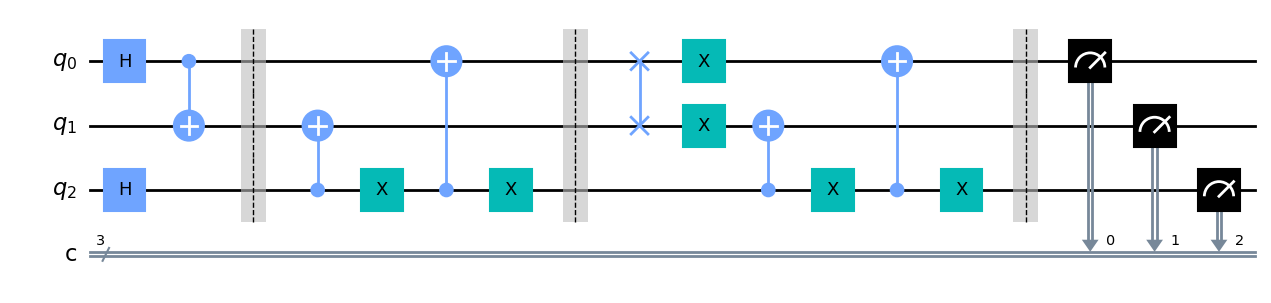

In [22]:

qc.draw("mpl")

In [16]:
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result_sim = job.result()


{'000': 270, '011': 235, '111': 251, '100': 268}
 
Legend:
 (0 droite ,1 gauche)
premier bit: réponse du gardien de droite 
deuxieme bit: réponse du gardien de gauche 
le troisieme bit:quelle gardien qui ment


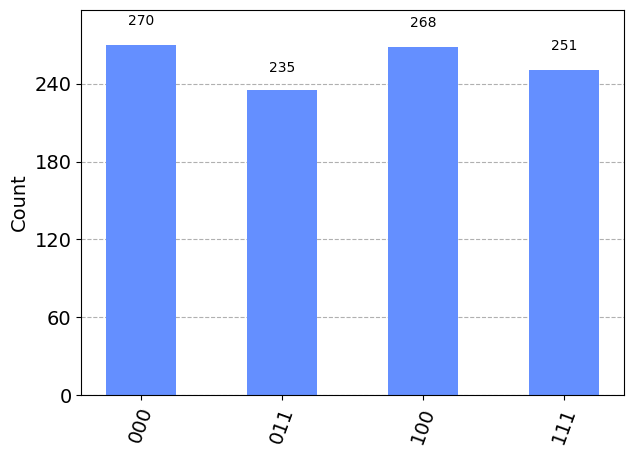

In [25]:
#vecteur d'etat
counts = result_sim.get_counts(compiled_circuit)
print(counts)

from qiskit.visualization import plot_histogram
print("\x1b[1;34m \nLegend:\n (0 droite ,1 gauche)\npremier bit: réponse du gardien de droite \ndeuxieme bit: réponse du gardien de gauche \nle troisieme bit:quelle gardien qui ment\x1b[0m")
plot_histogram(counts)